Brian Blaylock  
October 4, 2018

# Changes in HRRR RMSD with number of forecast members

Determine how the model spread changes when additional model runs become available.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3/')
from BB_HRRR.HRRR_Pando import get_hrrr_variable, get_hrrr_latlon, pluck_hrrr_point
from BB_MesoWest.get_MesoWest import get_mesowest_stninfo
from BB_maps.my_basemap import draw_HRRR_map

In [2]:
m = draw_HRRR_map()
latlon = get_hrrr_latlon()
lat = latlon['lat']
lon = latlon['lon']

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [27]:
x, y = pluck_hrrr_point(latlon, XY_only=True)
print(lat[x,y])
print(lon[x,y])

 >> Requested Center lat: 40.771	 lon: -111.965
 >>     Plucked HRRR lat: 40.76443	 lon: -111.98123
 >>     Plucked from   x: 645	   y: 494
40.76443
-111.98123


In [ ]:
validDATE = datetime(2018, 10, 4, 4)
variable = 'LTNG:entire'

if variable in ['LTNG:entire', 'WIND:10 m', 'ACPC:surface']:
    fxx = range(1, 19)
else:
    fxx = range(0,19)

HH = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['value'] for f in fxx])

The average spread (average standard deviation) is correclty computed with the square root of the average variance.

    Fortin, V., M. Abaza, F. Anctil, and R. Turcotte, 2014: 
        Why Should Ensemble Spread Match the RMSE of the Ensemble Mean?. 
        J. Hydrometeor., 15, 1708–1713, https://doi.org/10.1175/JHM-D-14-0008.1

In [ ]:
std = [np.std(HH[-i:], ddof=1, axis=0) for i in range(1, len(fxx)+1)]
var = [np.var(HH[-i:], ddof=1, axis=0) for i in range(1, len(fxx)+1)]

meanstd = [np.sqrt(np.mean(i)) for i in var]
maxstd = [i.max() for i in std]

print(meanstd)
print(maxstd)

In [ ]:
fig, [ax1, ax2] = plt.subplots(1,2, figsize=(15, 5))

ax1.plot(maxstd)
ax1.set_title('domain max spread')

ax2.plot(meanstd)
ax2.set_title('domain mean spread')

plt.setp([ax1, ax2], xticks=range(19), xticklabels=['f18\nf%02d' % i for i in range(18, -1, -1)]);

In [ ]:
fig, axes = plt.subplots(4,1, figsize=[15, 15])

indexes = [1, 8, 14, -1]
for i, ax in enumerate(axes):
    plt.sca(ax)
    plt.title('index %s' % (indexes[i]))
    m.pcolormesh(lon, lat, std[indexes[i]], latlon=True)
    plt.colorbar(orientation='horizontal', shrink=.8, pad=.01)

    m.drawcoastlines()

In [ ]:
fxx

In [ ]:
for j in fxx:
    F = range(j)
    std = ['HH[%s:%s]' % (i, j) for i in F]
    print(len(std), std)
    print(list(F))
    print()

F = fxx
std = ['HH[%s:]' % (i) for i in F]
print(len(std), std)
print(list(F))
print()
   

In [ ]:
var = [np.var(HH[i:1], ddof=1, axis=0) for i in range(1)]

In [ ]:
var

In [ ]:
meanstd = [np.sqrt(np.mean(i)) for i in var]
print(j, len(meanstd))

In [ ]:
meanstd

In [15]:
validDATE = datetime(2018, 10, 4, 4)
variable = 'HGT:500'
sVAR = variable.replace(':', '-').replace(' ', '-')
fxx = range(0, 19)

if variable.split(':')[0] == 'UVGRD':
    HH = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['SPEED'] for f in fxx])
else:
    HH = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['value'] for f in fxx])

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:125: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


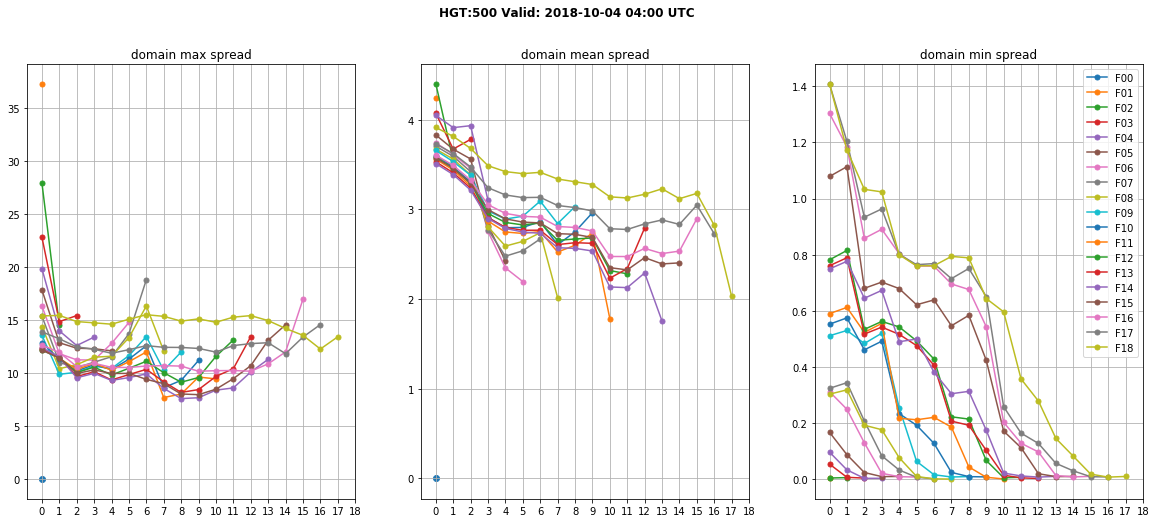

In [16]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=[20, 8])

ax1.scatter(0,0)
ax2.scatter(0,0)

for j in fxx:
    F = range(j)
    std = [np.std(HH[i:j], ddof=1, axis=0) for i in F]
    var = [np.var(HH[i:j], ddof=1, axis=0) for i in F]
    
    if len(std)>0:
        meanstd = [np.sqrt(np.mean(i)) for i in var]
        maxstd = [np.max(i) for i in std]
        minstd = [np.min(i) for i in std]
        xval = range(0, j)

        ax1.plot(xval, maxstd, marker='o', markersize=5, label='F%02d' % (F[-1]))
        ax2.plot(xval, meanstd, marker='o', markersize=5, label='F%02d' % (F[-1]))
        ax3.plot(xval, minstd, marker='o', markersize=5, label='F%02d' % (F[-1]))
        

# Final forecast time (F18)
F = fxx
std = [np.std(HH[i:], ddof=1, axis=0) for i in F]
var = [np.var(HH[i:], ddof=1, axis=0) for i in F]

meanstd = [np.sqrt(np.mean(i)) for i in var]
maxstd = [np.max(i) for i in std]
minstd = [np.min(i) for i in std]
xval = fxx

ax1.plot(xval, maxstd, marker='o', markersize=5, label='F%02d' % (F[-1]))
ax2.plot(xval, meanstd, marker='o', markersize=5, label='F%02d' % (F[-1]))
ax3.plot(xval, minstd, marker='o', markersize=5, label='F%02d' % (F[-1]))

ax1.set_title('domain max spread')
ax2.set_title('domain mean spread')
ax3.set_title('domain min spread')

ax1.grid()
ax2.grid()
ax3.grid()

ax3.legend()

plt.suptitle('%s Valid: %s' % (variable, validDATE.strftime('%Y-%m-%d %H:%M UTC')), fontweight='semibold')
plt.setp([ax1, ax2, ax3], xticks=range(19));
#plt.setp([ax1, ax2], xticks=range(19), xticklabels=['f18\nf%02d' % i for i in range(18, -1, -1)]);

plt.savefig('./figs/spread_trend_%s_%s' % (sVAR, validDATE.strftime('%Y-%m-%d_%H%M')))

# For a point

In [15]:
validDATE = datetime(2018, 10, 4, 4)
variable = 'APCP:surface'
sVAR = variable.replace(':', '-').replace(' ', '-')
fxx = range(0, 19)

if variable.split(':')[0] == 'UVGRD':
    HH = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['SPEED'] for f in fxx])
else:
    HH = np.array([get_hrrr_variable(validDATE-timedelta(hours=f), variable, fxx=f, verbose=False)['value'] for f in fxx])


Retrieving from MesoWest API: http://api.mesowest.net/v2/stations/metadata?&token=2562b729557f45f5958516081f06c9eb&stid=KSLC

 >> Requested Center lat: 40.77069	 lon: -111.96503
 >>     Plucked HRRR lat: 40.76443	 lon: -111.98123
 >>     Plucked from   x: 645	   y: 494


/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


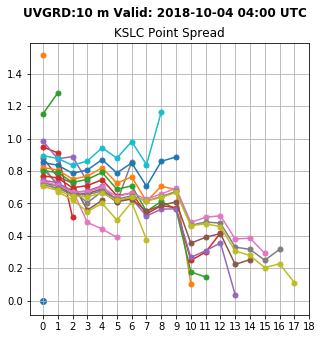

In [16]:
stn = 'KSLC'
a = get_mesowest_stninfo(stn)
x, y = pluck_hrrr_point(latlon, lat=a[stn]['LAT'], lon=a[stn]['LON'], XY_only=True)

fig, ax1 = plt.subplots(1,1, figsize=[5, 5])

ax1.scatter(0,0)

for j in fxx:
    F = range(j)
    std = [np.std(HH[i:j][:,x,y], ddof=1) for i in F]
    
    if len(std)>0:
        xval = range(0, j)
        ax1.plot(xval, std, marker='o', markersize=5, label='F%02d' % (F[-1]))
        

# Final forecast time (F18)
F = fxx
std = [np.std(HH[i:][:,x,y], ddof=1, axis=0) for i in F]
xval = fxx

ax1.plot(xval, std, marker='o', markersize=5, label='F%02d' % (F[-1]))

ax1.set_title('%s Point Spread' % stn)

ax1.grid()


plt.suptitle('%s Valid: %s' % (variable, validDATE.strftime('%Y-%m-%d %H:%M UTC')), fontweight='semibold')
plt.setp([ax1], xticks=range(19));
#plt.setp([ax1, ax2], xticks=range(19), xticklabels=['f18\nf%02d' % i for i in range(18, -1, -1)]);

plt.savefig('./figs/spread_trend_%s_%s_%s' % (stn.upper(), sVAR, validDATE.strftime('%Y-%m-%d_%H%M')))

In [1]:
import sys

sys.stdout.write(msg)
sys.stdout.flush()

NameError: name 'msg' is not defined

In [3]:
import time
import sys

toolbar_width = 40

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

for i in range(toolbar_width):
    time.sleep(0.1) # do real work here
    # update the bar
    sys.stdout.write("-")
    sys.stdout.flush()

sys.stdout.write("\n")

[                                        ----------------------------------------


In [5]:
import time

for n in range(1,101):
    hash = ((60*n)//100)
    print("[{}{}] {}%".format('#' * hash, ' ' * (60-hash), n), end="\r")
    time.sleep(0.05)

In [7]:
from time import sleep
x = 0
while x < 20:
    print('\r' + '.' * x, end="")
    x += 1
    sleep(0.1)

...................

In [9]:
for n in range(1,101):
    hash = ((60*n)//100)
    print("[%s %s] %s%%" % ('#' * hash, ' ' * (60-hash), n), end="\r")
    time.sleep(0.05)